# Initial Setting

In [1]:
%matplotlib inline

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

np.random.seed(20200426)
tf.random.set_seed(20200426)

print("tensorflow version : " + tf.__version__)

tensorflow version : 2.3.1


# Create input data and deep learning laye

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3),
                        padding='same',
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Conv2D(64, (3, 3),
                        padding='same',
                        activation='relu',
                        name='conv_filter2-1'))
model.add(layers.Conv2D(64, (3, 3),
                        padding='same',
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Conv2D(128, (3, 3),
                        padding='same',
                        activation='relu'))
model.add(layers.Conv2D(128, (3, 3),
                        padding='same',
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,
                       activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_filter2-1 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

# Trainning

Epoch 1/20
98/98 [==============================] - 7s 75ms/step - loss: 1.9678 - accuracy: 0.2677 - val_loss: 1.7161 - val_accuracy: 0.3788
Epoch 2/20
98/98 [==============================] - 6s 60ms/step - loss: 1.5934 - accuracy: 0.4141 - val_loss: 1.4127 - val_accuracy: 0.4896
Epoch 3/20
98/98 [==============================] - 6s 61ms/step - loss: 1.4105 - accuracy: 0.4881 - val_loss: 1.2498 - val_accuracy: 0.5447
Epoch 4/20
98/98 [==============================] - 6s 60ms/step - loss: 1.2674 - accuracy: 0.5441 - val_loss: 1.1682 - val_accuracy: 0.5829
Epoch 5/20
98/98 [==============================] - 6s 60ms/step - loss: 1.1520 - accuracy: 0.5880 - val_loss: 1.0669 - val_accuracy: 0.6144
Epoch 6/20
98/98 [==============================] - 6s 61ms/step - loss: 1.0651 - accuracy: 0.6223 - val_loss: 0.9594 - val_accuracy: 0.6520
Epoch 7/20
98/98 [==============================] - 6s 61ms/step - loss: 1.0012 - accuracy: 0.6460 - val_loss: 0.9193 - val_accuracy: 0.6674
Epoch 8/20
98

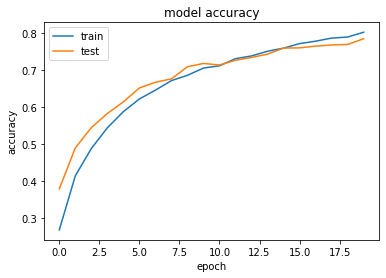

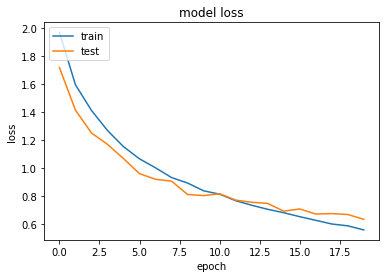

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=512,
                    epochs=20)

#正答率
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save the model

In [4]:
#model.save('models\\cnn_cifar10.h5')
model.save('models/cnn_cifar10.h5')

print(model.input)
print(model.output)

Tensor("conv2d_input:0", shape=(None, 32, 32, 3), dtype=float32)
Tensor("dense_1/Softmax:0", shape=(None, 10), dtype=float32)


# Predict

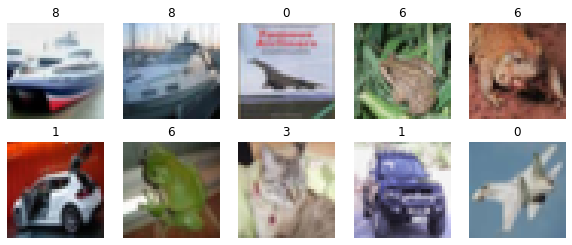

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#model = models.load_model('models\\cnn_cifar10.h5')
model = models.load_model('models/cnn_cifar10.h5')

plt.figure(figsize=(10, 4))
num = 0

while num < 2 * 5:
    num += 1
    plt.subplot(2, 5, num)
    plt.imshow(x_test[num])
    plt.axis('off')
    
    x = x_test[num]
    x = x.reshape(1, 32, 32,3)
    plt.title(np.argmax(model.predict(x)))
    